<ipython-input-3-2ea66fde6dd8>:46: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'z', offset = 8, cmap = 'viridis', anpha = 0.5)
<ipython-input-3-2ea66fde6dd8>:47: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-3-2ea66fde6dd8>:48: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


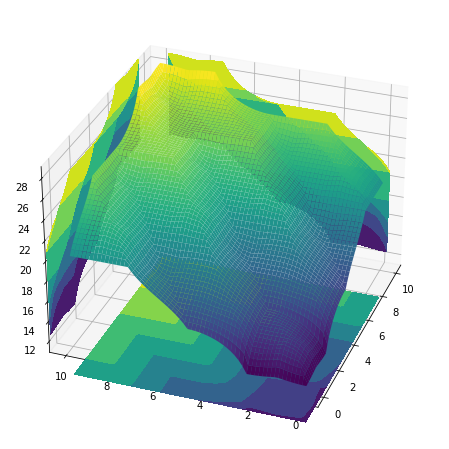

In [3]:
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(0, 10, 61)
universe1 = np.linspace(10, 30, 61)

food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Consequent(universe1, 'tip')

#names = [1, 2, 3, 4, 5]
names = ['VP','P','AV','G','VG']
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names) 

rule0 = ctrl.Rule(antecedent = ((food['VP'] & service['VP'])|(food['P'] & service['VP'])|(food['VP'] & service['P'])),
                  consequent = tip['VP'],label = 'ruleVP')
rule1 = ctrl.Rule(antecedent = ((food['AV'] & service['VP'])|(food['P'] & service['P'])|(food['VP'] & service['AV'])),
                  consequent = tip['P'],label = 'ruleP')
rule2 = ctrl.Rule(antecedent = ((food['G'] & service['VP'])|(food['AV'] & service['P'])|(food['P'] & service['AV'])|(food['VP'] & service['G'])|(food['VG'] & service['VP'])|(food['G'] & service['P'])|(food['AV'] & service['AV'])|(food['P'] & service['G'])|(food['VP'] & service['VG'])),
                  consequent = tip['AV'],label = 'ruleAV')
rule3 = ctrl.Rule(antecedent = ((food['VG'] & service['P'])|(food['G'] & service['AV'])|(food['AV'] & service['G'])|(food['P'] & service['VG'])|(food['VG'] & service['AV'])|(food['G'] & service['G'])|(food['AV'] & service['VG'])),
                  consequent = tip['G'],label = 'ruleG')
rule4 = ctrl.Rule(antecedent = ((food['VG'] & service['G'])|(food['G'] & service['VG'])|(food['VG'] & service['VG'])),
                  consequent = tip['VG'],label = 'ruleVG')
system = ctrl.ControlSystem(rules =[rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run = 61*61+1)
unsampled = np.linspace(0,10,61)
x,y = np.meshgrid(unsampled,unsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61): 
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['tip']

fig = plt.figure(figsize = (8,8))  # Hinh 8x8
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z,zdir = 'z', offset = 8, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z,zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z,zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)

In [2]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=236fee2a40afbeb0400629786a3d39017a1315f123c0ece544d56ffafa921bad
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
